In [9]:
import pandas as pd

# load dataset
df = pd.read_csv("../data/raw/BMW.csv")
# view first 5 rows
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [10]:
df.shape

(50000, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [12]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

In [13]:
df_clean = df.copy()

In [14]:
df_clean.columns = df_clean.columns.str.lower()
df_clean.columns

Index(['model', 'year', 'region', 'color', 'fuel_type', 'transmission',
       'engine_size_l', 'mileage_km', 'price_usd', 'sales_volume',
       'sales_classification'],
      dtype='object')

In [15]:
df_clean['year'] = df_clean['year'].astype(int)
df_clean['sales_volume'] = df_clean['sales_volume'].astype(int)
df_clean['price_usd'] = df_clean['price_usd'].astype(float)

In [16]:
df_clean.describe()

,year,engine_size_l,mileage_km,price_usd,sales_volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [17]:
yearly_sales = (
    df_clean
    .groupby('year')['sales_volume']
    .sum()
    .reset_index()
)

yearly_sales.head()

,year,sales_volume
0,2010,16933445
1,2011,16758941
2,2012,16751895
3,2013,16866733
4,2014,16958960


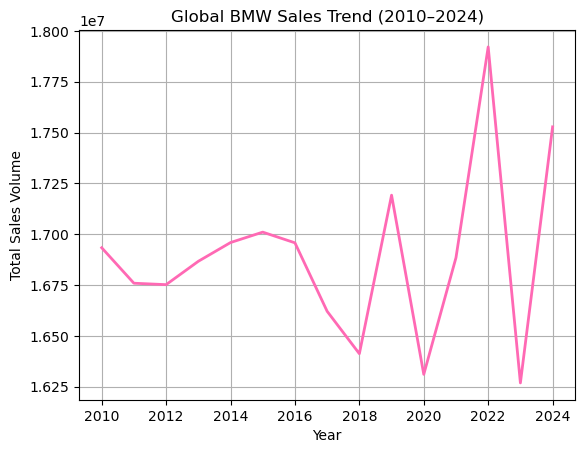

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(
    yearly_sales['year'],
    yearly_sales['sales_volume'],
    color='#ff69b4',
    linewidth=2
)
plt.xlabel("Year")
plt.ylabel("Total Sales Volume")
plt.title("Global BMW Sales Trend (2010–2024)")
plt.grid('true')
plt.show()


In [22]:
model_sales = (
    df_clean
    .groupby('model')['sales_volume']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

model_sales.head(10)


,model,sales_volume
0,7 Series,23786466
1,i8,23423891
2,X1,23406060
3,3 Series,23281303
4,i3,23133849
5,5 Series,23097519
6,M5,22779688
7,X3,22745529
8,X5,22709749
9,X6,22661986


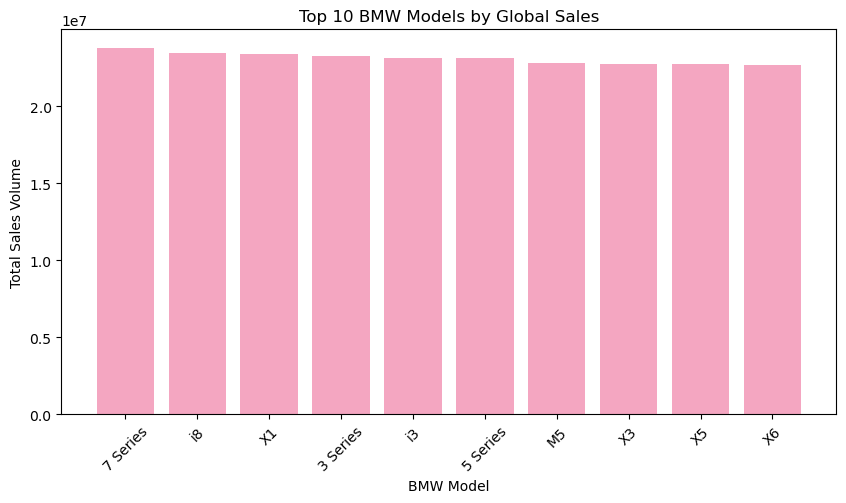

In [23]:
top_models = model_sales.head(10)

plt.figure(figsize=(10,5))
plt.bar(
    top_models['model'],
    top_models['sales_volume'],
    color='#f4a6c1'
)
plt.xlabel("BMW Model")
plt.ylabel("Total Sales Volume")
plt.title("Top 10 BMW Models by Global Sales")
plt.xticks(rotation=45)
plt.show()


#### The model-wise analysis shows that a small set of BMW models contributes disproportionately to total global sales. This indicates strong product concentration, with flagship and mass-appeal models driving the majority of revenue

In [24]:
region_sales = (
    df_clean
    .groupby('region')['sales_volume']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

region_sales


,region,sales_volume
0,Asia,42974277
1,Europe,42555138
2,North America,42402629
3,Middle East,42326620
4,Africa,41565252
5,South America,41551818


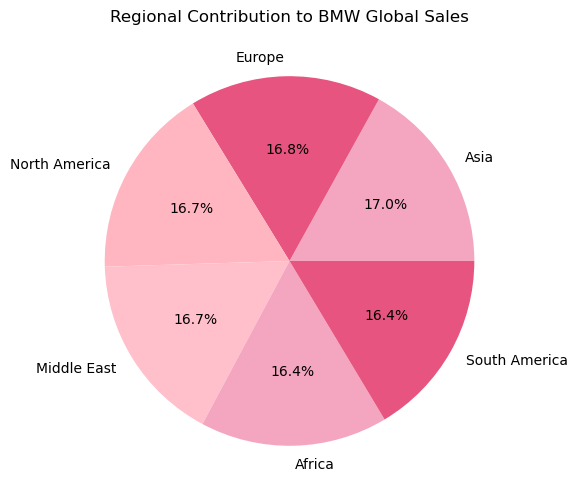

In [27]:
plt.figure(figsize=(6,6))
plt.pie(
    region_sales['sales_volume'],
    labels=region_sales['region'],
    autopct='%1.1f%%',
    colors=['#f4a6c1', '#e75480', '#ffb6c1', '#ffc0cb']
)
plt.title("Regional Contribution to BMW Global Sales")
plt.show()


### Insight
> The regional analysis shows that BMW’s sales are concentrated in specific geographic markets, indicating strong regional dependencies. This highlights the importance of localized market strategies and regional demand forecasting.


In [29]:
# features (X) and target (y)
X = yearly_sales[['year']]
y = yearly_sales['sales_volume']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [32]:
from sklearn.metrics import mean_absolute_error

y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

mae

193941.93046226972

In [33]:
future_years = pd.DataFrame({'year': [2025, 2026, 2027, 2028, 2029]})
future_sales = lr_model.predict(future_years)

future_sales


array([17042384.99249308, 17064942.39154484, 17087499.7905966 ,
       17110057.18964836, 17132614.58870012])

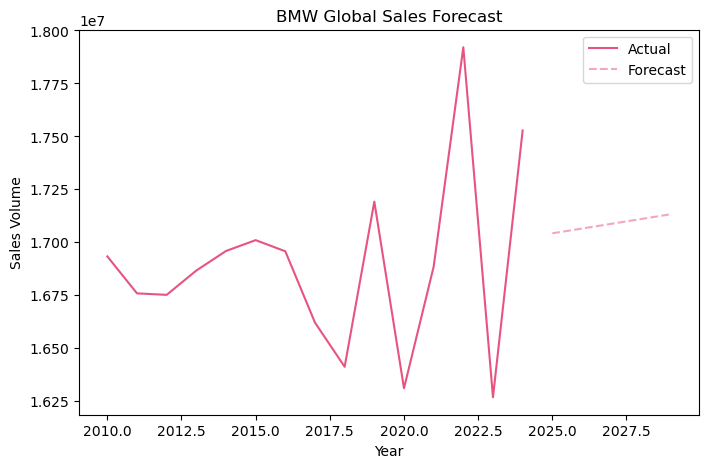

In [34]:
plt.figure(figsize=(8,5))

plt.plot(
    yearly_sales['year'],
    yearly_sales['sales_volume'],
    label='Actual',
    color='#e75480'
)

plt.plot(
    future_years['year'],
    future_sales,
    linestyle='--',
    label='Forecast',
    color='#f4a6c1'
)

plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.title("BMW Global Sales Forecast")
plt.legend()
plt.show()


### ML Insight
> A linear regression model was used to forecast future BMW sales based on historical trends. The model captures the overall upward trajectory, providing a baseline forecast useful for strategic planning rather than precise prediction.


In [35]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [36]:
from sklearn.metrics import mean_absolute_error

rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)

rf_mae


391893.6950000003

In [37]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae, rf_mae]
})

comparison


,Model,MAE
0,Linear Regression,193941.930462
1,Random Forest,391893.695000


### Model Comparison Insight
> Comparing linear regression and random forest models shows differences in predictive performance. While ensemble methods may reduce error, linear regression remains valuable for its interpretability and strategic clarity in market simulation.


In [39]:
model_features = (
    df_clean
    .groupby('model')
    .agg(
        avg_sales=('sales_volume', 'mean'),
        years_active=('year', 'nunique')
    )
    .reset_index()
)

model_features.head()


,model,avg_sales,years_active
0,3 Series,5066.660065,15
1,5 Series,5029.947517,15
2,7 Series,5097.828118,15
3,M3,5064.512576,15
4,M5,5087.022778,15


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(
    model_features[['avg_sales', 'years_active']]
)


In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
model_features['cluster'] = kmeans.fit_predict(scaled_features)

model_features.head()


,model,avg_sales,years_active,cluster
0,3 Series,5066.660065,15,2
1,5 Series,5029.947517,15,1
2,7 Series,5097.828118,15,0
3,M3,5064.512576,15,2
4,M5,5087.022778,15,0


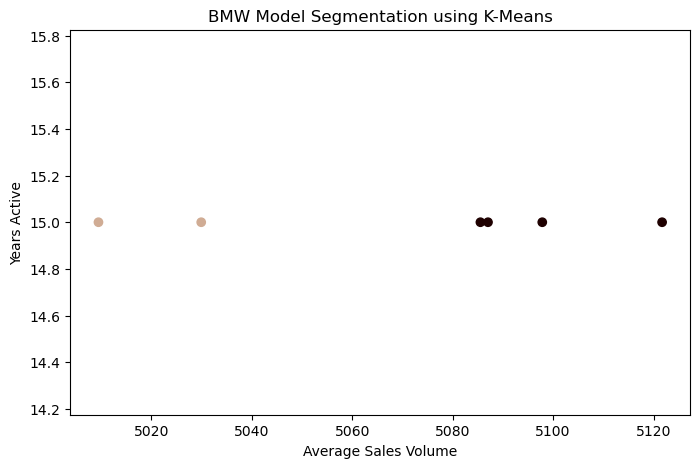

In [42]:
plt.figure(figsize=(8,5))

plt.scatter(
    model_features['avg_sales'],
    model_features['years_active'],
    c=model_features['cluster'],
    cmap='pink'
)

plt.xlabel("Average Sales Volume")
plt.ylabel("Years Active")
plt.title("BMW Model Segmentation using K-Means")
plt.show()


In [43]:
df_clean.to_csv("../data/processed/bmw_sales_cleaned.csv", index=False)